# **1. Perkenalan Dataset**


**Sumber Dataset**: [Employee Dataset](https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset) (Kaggle)

Dataset Employee Dataset berisi informasi mengenai karyawan dalam sebuah perusahaan yang mencakup latar belakang pendidikan, riwayat kerja, karakteristik demografis, serta faktor-faktor terkait pekerjaan. Dataset ini telah dianonimkan untuk melindungi privasi individu, namun tetap memberikan informasi yang relevan untuk analisis tenaga kerja.

Dataset ini memiliki beberapa atribut utama, antara lain:



*   **Education**, tingkat pendidikan karyawan.
*   **JoiningYear**, tahun karyawan bergabung dengan perusahaan.
*   **City**, kota tempat karyawan bekerja.
*   **Age**, usia karyawan.
*   **Gender**, jenis kelamin karyawan.
*   **EverBenched**, indikator apakah karyawan pernah tidak mendapatkan penugasan kerja.
*   **ExperienceInCurrentDomain**, jumlah tahun pengalaman karyawan pada bidang pekerjaan saat ini.

Dataset ini dapat digunakan untuk mendukung analisis di bidang Human Resources, seperti pemetaan struktur gaji, evaluasi kesenjangan kompetensi, serta pengambilan keputusan strategis terkait manajemen sumber daya manusia berbasis data.


# **2. Import Library**

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
plt.style.use("seaborn-v0_8")

# **3. Memuat Dataset**

In [39]:
df = pd.read_csv("Employee_raw.csv")
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


# **4. Exploratory Data Analysis (EDA)**


## Gambaran Umum Struktur Data

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [41]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [42]:
df.shape

(4653, 9)

## Analisis Distribusi Target PaymentTier

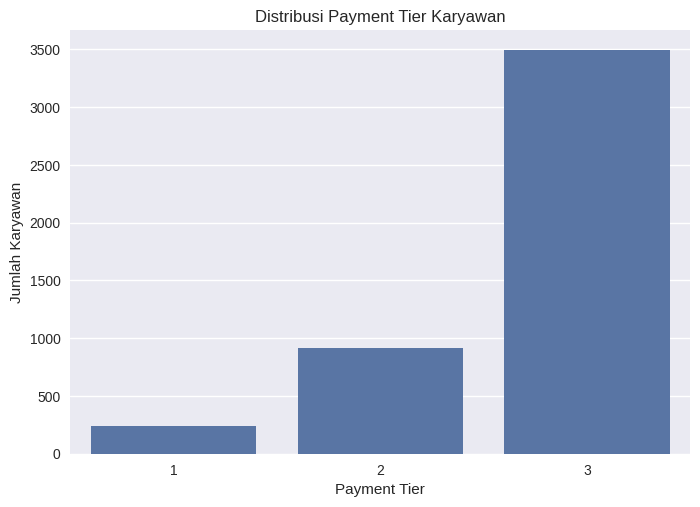

In [43]:
sns.countplot(x="PaymentTier", data=df)
plt.title("Distribusi Payment Tier Karyawan")
plt.xlabel("Payment Tier")
plt.ylabel("Jumlah Karyawan")
plt.show()

## Analisis Kualitas Data (Missing value)

In [44]:
df.isnull().sum()

,0
Education,0
JoiningYear,0
City,0
PaymentTier,0
Age,0
Gender,0
EverBenched,0
ExperienceInCurrentDomain,0
LeaveOrNot,0


## Analisis Distribusi Fitur Numerik

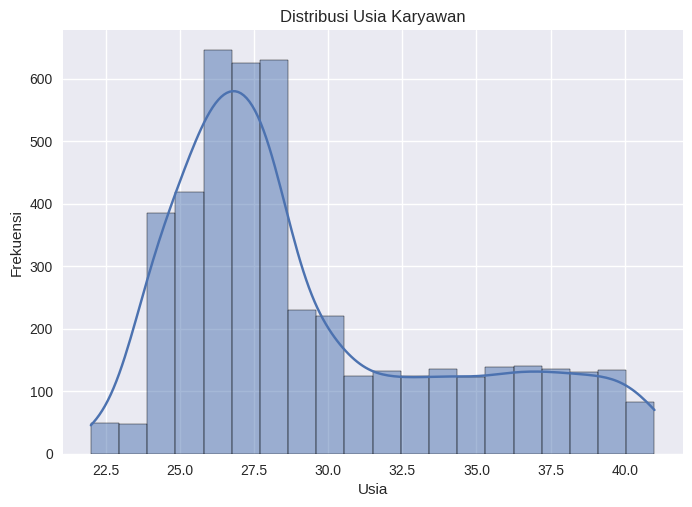

In [45]:
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Distribusi Usia Karyawan")
plt.xlabel("Usia")
plt.ylabel("Frekuensi")
plt.show()


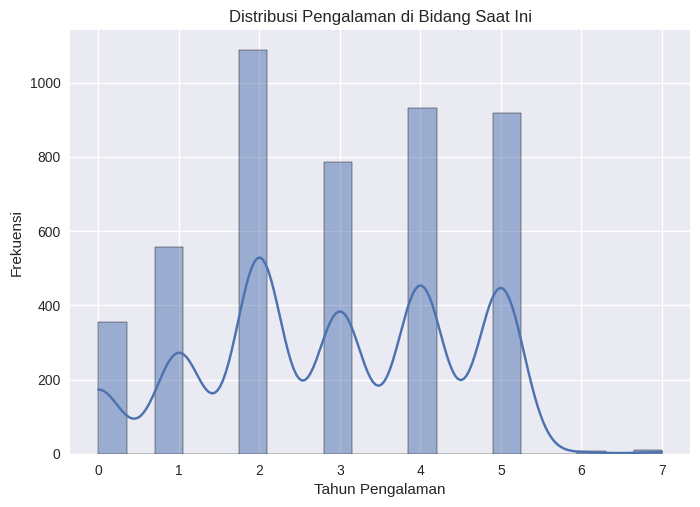

In [46]:
sns.histplot(df["ExperienceInCurrentDomain"], bins=20, kde=True)
plt.title("Distribusi Pengalaman di Bidang Saat Ini")
plt.xlabel("Tahun Pengalaman")
plt.ylabel("Frekuensi")
plt.show()

## Analisis Fitur Kategorikal

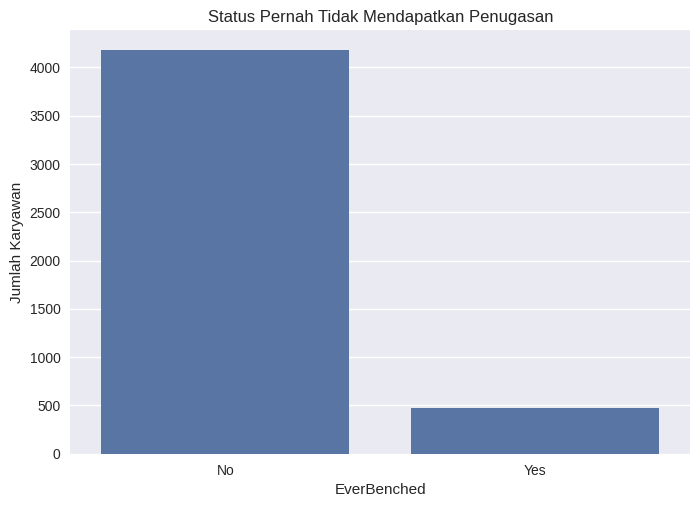

In [47]:
sns.countplot(x="EverBenched", data=df)
plt.title("Status Pernah Tidak Mendapatkan Penugasan")
plt.xlabel("EverBenched")
plt.ylabel("Jumlah Karyawan")
plt.show()

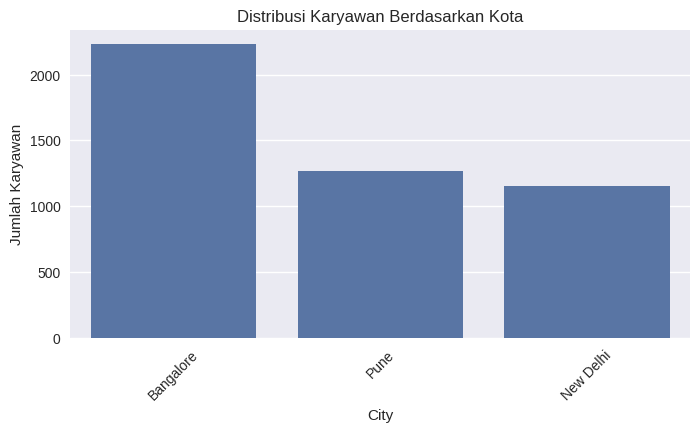

In [48]:
plt.figure(figsize=(8, 4))
sns.countplot(x="City", data=df)
plt.title("Distribusi Karyawan Berdasarkan Kota")
plt.xlabel("City")
plt.ylabel("Jumlah Karyawan")
plt.xticks(rotation=45)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## Pemisahan Fitur dan Target

In [49]:
FeatureDf = df.drop("PaymentTier", axis=1)
TargetSeries = df["PaymentTier"]

## Encoding Data Kategorikal

In [50]:
EncodedFeatureDf = pd.get_dummies(FeatureDf, drop_first=True)

## Standarisasi Fitur

In [51]:
Scaler = StandardScaler()
ScaledFeatures = Scaler.fit_transform(EncodedFeatureDf)

In [52]:
ProcessedDf = pd.DataFrame(
    ScaledFeatures,
    columns=EncodedFeatureDf.columns
)

ProcessedDf["PaymentTier"] = TargetSeries.values

## Penyimpanan Dataset Hasil Preprocessing

In [53]:
ProcessedDf.to_csv("Employee_preprocessing.csv", index=False)